In [189]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [190]:
#import data
data=pd.read_csv('../data_processed/data_dummy_variable_etnicity_country_gender.csv')
data.drop(columns= ['Unnamed: 0', 'id_number'],axis=1, inplace=True)
display(data)

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,white,other2,australia,canada,new_zealand,ireland,uk,usa,male,female
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,1,0,0,1
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,1,0,0,0,0,0,1,0,1,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,1,0,0,0,0,0,1,0,1,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,1,0,0,0,0,0,1,0,0,1
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,1,0,0,0,0,0,0,1,0,1
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,1,0,0,0,0,0,0,1,1,0
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,1,0,0,0,0,0,0,1,0,1
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,0,0,0,0,0,0,1,0,1


In [191]:
##Strategy 
# 1. create a list of thresholds. Threshold= how often you need to consume a drug to be considered addicted. 1 threshold for every drug
# 2. Probably need to create column addicted for every drug
# 3. Define addicted or not:
#    for every drug for loop
#    if threshod>= consumption,
#    new column= 1
#    else=0
# 4. Probably create new column for addiction_depressants
# 5. Define addiction level
     # if sum of addiction columns >1 
    #new column = 2
    #if =1 , 1
    #else = 0

## Depressants

In [192]:
#1. list of depressants and thresholds - I chose them 
depressants= ['alcohol', 'benzo', 'cannabis', 'ketamine', 'heroine']
thresholds_d= [6, 4, 5, 4, 3]

In [193]:
#2 and 3 -> create column for every drug + loop to define addiction to every drug

for sub, thresh in zip(depressants, thresholds_d): 
        data[sub + "_addiction"] = [1 if i >= thresh else 0 for i in data[sub]]
    
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,ireland,uk,usa,male,female,alcohol_addiction,benzo_addiction,cannabis_addiction,ketamine_addiction,heroine_addiction
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,1,0,0,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,1,0,1,0,0,0,0,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,1,0,1,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,1,0,0,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,0,1,0,1,0,0,1,0,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,1,1,0,0,0,0,0,0
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,1,0,1,0,1,1,0,0
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,0,1,0,1,0,0,1,0,0


In [194]:
#check if it works 

print(sum(data["alcohol_addiction"]))
print(sum(data["benzo_addiction"]))
print(sum(data["cannabis_addiction"]))
print(sum(data["ketamine_addiction"]))
print(sum(data["heroine_addiction"]))

505
299
648
79
118


In [195]:
#create column for depressants addicts 
depressant_add=["alcohol_addiction","benzo_addiction","cannabis_addiction","ketamine_addiction","heroine_addiction"]
data['depressant_addiction'] = data[depressant_add].sum(axis=1)
data['depressant_addiction'].value_counts()

0    781
1    709
2    271
3    101
4     20
5      3
Name: depressant_addiction, dtype: int64

In [196]:
data

print(sum(data["depressant_addiction"]))



1649


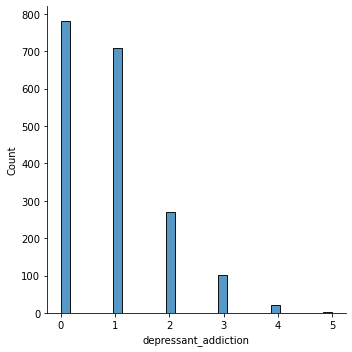

In [197]:
sns.displot(data, x="depressant_addiction")

In [198]:
data['depr_add_aggr']=[2 if i >1 else 1 if i==1 else 0 for i in data['depressant_addiction']]

data['depr_add_aggr'].value_counts()

0    781
1    709
2    395
Name: depr_add_aggr, dtype: int64

In [199]:
#we will decide what to do with alcohol
#maybe run again without alcohol 

## Depressants without alcohol

In [200]:
#1. list of depressants and thresholds - I chose them 
depressants_woa= ['benzo', 'cannabis', 'ketamine', 'heroine']
thresholds_d_woa= [4, 5, 4, 3]

In [201]:
#2 and 3 -> create column for every drug + loop to define addiction to every drug

for sub, thresh in zip(depressants_woa, thresholds_d_woa): 
        data[sub + "_addiction"] = [1 if i >= thresh else 0 for i in data[sub]]
    
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,usa,male,female,alcohol_addiction,benzo_addiction,cannabis_addiction,ketamine_addiction,heroine_addiction,depressant_addiction,depr_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,1,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,1,0,0,0,0,0,0,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,1,0,1,0,0,0,0,1,1
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,1,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,1,0,1,0,0,1,0,0,1,1
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,1,1,0,0,0,0,0,0,0,0
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,1,0,1,0,1,1,0,0,2,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,0,1,0,0,1,0,0,1,1


In [202]:
#create column for depressants addicts 
depressant_woa_add=["benzo_addiction","cannabis_addiction","ketamine_addiction","heroine_addiction"]
data['depressant_woa_addiction'] = data[depressant_woa_add].sum(axis=1)
data['depressant_woa_addiction'].value_counts()

0    1071
1     558
2     189
3      60
4       7
Name: depressant_woa_addiction, dtype: int64

In [203]:
data

print(sum(data["depressant_woa_addiction"]))


1144


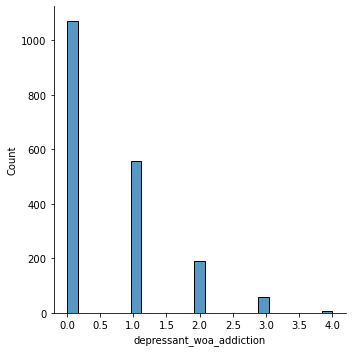

In [204]:
sns.displot(data, x="depressant_woa_addiction")

In [205]:
data['depr_woa_add_aggr']=[2 if i >1 else 1 if i==1 else 0 for i in data['depressant_woa_addiction']]

data['depr_woa_add_aggr'].value_counts()

0    1071
1     558
2     256
Name: depr_woa_add_aggr, dtype: int64

## Hallucinogens 

In [206]:
#create list of hallucinogens and thresholds - I chose them 
hallucinogens= ['cannabis', 'ketamine', 'lsd', 'mushrooms']
thresholds_h=[6, 4, 3, 3 ]

In [207]:
for hal, thresh in zip(hallucinogens, thresholds_h):
    data[hal + '_hall']= [1 if i>= thresh else 0 for i in data[hal]]
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,ketamine_addiction,heroine_addiction,depressant_addiction,depr_add_aggr,depressant_woa_addiction,depr_woa_add_aggr,cannabis_hall,ketamine_hall,lsd_hall,mushrooms_hall
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,0,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,0,1,1,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,0,1,1,1,1,0,0,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,0,0,0,0,0,0,1,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,2,2,2,2,1,0,0,0
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,0,1,1,1,1,1,0,1,1


In [208]:
#check if it works 

print(sum(data["lsd_hall"]))
print(sum(data["mushrooms_hall"]))
print(sum(data["cannabis_hall"]))
print(sum(data["ketamine_hall"]))


380
434
463
79


In [209]:
hall_add=["lsd_hall", "mushrooms_hall","cannabis_hall","ketamine_hall" ]
data['hallucinogen_addiction'] = data[hall_add].sum(axis=1)

data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,heroine_addiction,depressant_addiction,depr_add_aggr,depressant_woa_addiction,depr_woa_add_aggr,cannabis_hall,ketamine_hall,lsd_hall,mushrooms_hall,hallucinogen_addiction
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,0,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,1,1,0,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,1,1,1,1,0,0,1,0,1
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,0,0,0,0,0,1,1,2
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,2,2,2,2,1,0,0,0,1
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,1,1,1,1,1,0,1,1,3


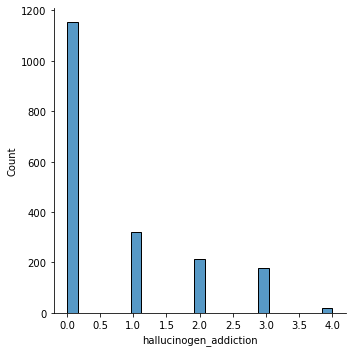

In [210]:
sns.displot(data, x="hallucinogen_addiction")

In [211]:
#depending on the accuracy of results we can decide to use 3 or 2 classes

In [212]:
data['hall_add_aggr']=[2 if i >1 else 1 if i==1 else 0 for i in data['hallucinogen_addiction']]

data['hall_add_aggr'].value_counts() 

0    1153
2     410
1     322
Name: hall_add_aggr, dtype: int64

## Hallucinogens without cannabis

In [213]:
#create list of hallucinogens and thresholds - I chose them 
hallucinogens_woc= ['ketamine', 'lsd', 'mushrooms']
thresholds_h_woc=[4, 3, 3 ]

In [214]:
for hal, thresh in zip(hallucinogens_woc, thresholds_h_woc):
    data[hal + '_hall']= [1 if i>= thresh else 0 for i in data[hal]]
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,depressant_addiction,depr_add_aggr,depressant_woa_addiction,depr_woa_add_aggr,cannabis_hall,ketamine_hall,lsd_hall,mushrooms_hall,hallucinogen_addiction,hall_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,0,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,1,1,0,0,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,1,1,1,1,0,0,1,0,1,1
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,0,0,0,0,1,1,2,2
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,2,2,2,2,1,0,0,0,1,1
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,1,1,1,1,0,1,1,3,2


In [215]:
hall_add_woc=["lsd_hall", "mushrooms_hall","ketamine_hall" ]
data['hallucinogen_woc_addiction'] = data[hall_add_woc].sum(axis=1)

data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,depr_add_aggr,depressant_woa_addiction,depr_woa_add_aggr,cannabis_hall,ketamine_hall,lsd_hall,mushrooms_hall,hallucinogen_addiction,hall_add_aggr,hallucinogen_woc_addiction
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,0,0,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,1,0,0,0,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,1,1,1,0,0,1,0,1,1,1
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,0,0,0,1,1,2,2,2
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,2,2,2,1,0,0,0,1,1,0
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,1,1,1,0,1,1,3,2,2


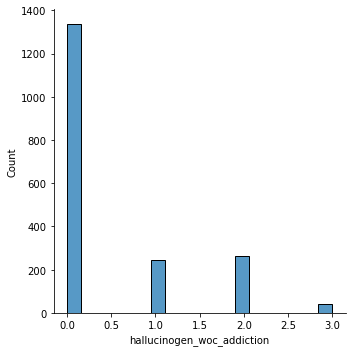

In [216]:
sns.displot(data, x="hallucinogen_woc_addiction")

In [217]:
data['hall_woc_add_aggr']=[2 if i >1 else 1 if i==1 else 0 for i in data['hallucinogen_woc_addiction']]

data['hall_woc_add_aggr'].value_counts() 

0    1338
2     304
1     243
Name: hall_woc_add_aggr, dtype: int64

## Stimulants

In [218]:
#create list of stimulants and thresholds - I chose them 
stimulants= ['anphet', 'cocaine', 'ecstasy', 'meth']
thresholds_s=[3, 4, 3, 4 ]

In [219]:
#2 and 3 -> create column for every drug + loop to define addiction to every drug

for sub, thresh in zip(stimulants, thresholds_s): 
        data[sub + "_add"] = [1 if i >= thresh else 0 for i in data[sub]]
    
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,lsd_hall,mushrooms_hall,hallucinogen_addiction,hall_add_aggr,hallucinogen_woc_addiction,hall_woc_add_aggr,anphet_add,cocaine_add,ecstasy_add,meth_add
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,0,1,0
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,1,0,1,1,1,1,0,0,0,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,1,1,2,2,2,2,0,0,0,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,1,1,0,0,1,1,1,0
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,1,3,2,2,2,0,0,1,0


In [220]:
#check if it works 

print(sum(data["anphet_add"]))
print(sum(data["cocaine_add"]))
print(sum(data["ecstasy_add"]))
print(sum(data["meth_add"]))

436
159
517
171


In [221]:
stim_add=["anphet_add", "cocaine_add","ecstasy_add","meth_add" ]
data['stimulant_addiction'] = data[stim_add].sum(axis=1)

data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,mushrooms_hall,hallucinogen_addiction,hall_add_aggr,hallucinogen_woc_addiction,hall_woc_add_aggr,anphet_add,cocaine_add,ecstasy_add,meth_add,stimulant_addiction
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,1,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,1,1,1,1,0,0,0,0,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,1,2,2,2,2,0,0,0,1,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,1,1,0,0,1,1,1,0,3
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,3,2,2,2,0,0,1,0,1


,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,mushrooms_hall,hallucinogen_addiction,hall_add_aggr,hallucinogen_woc_addiction,hall_woc_add_aggr,anphet_add,cocaine_add,ecstasy_add,meth_add,stimulant_addiction
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,0,0,0,0,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,0,0,0,0,0,0,1,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,0,0,0,0,0,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,0,0,0,0,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,1,1,1,1,0,0,0,0,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,1,2,2,2,2,0,0,0,1,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,1,1,0,0,1,1,1,0,3
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,1,3,2,2,2,0,0,1,0,1


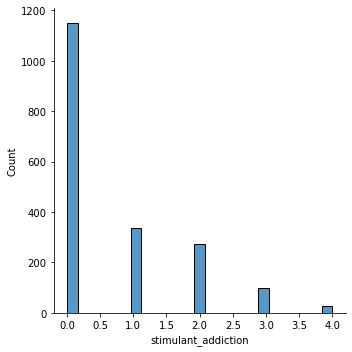

In [222]:
sns.displot(data, x="stimulant_addiction")
data

In [223]:
data['stim_add_aggr']=[2 if i >1 else 1 if i==1 else 0 for i in data['stimulant_addiction']]

data['stim_add_aggr'].value_counts() 

0    1150
2     397
1     338
Name: stim_add_aggr, dtype: int64

In [224]:
data.drop(columns = ['depressant_addiction',"alcohol_addiction","benzo_addiction","cannabis_addiction","ketamine_addiction","heroine_addiction",'hallucinogen_addiction','lsd_hall',"mushrooms_hall","cannabis_hall","ketamine_hall", 'stimulant_addiction', "anphet_add","cocaine_add","ecstasy_add","meth_add","depressant_woa_addiction","hallucinogen_woc_addiction"], 
          axis =1, inplace=True)


In [225]:
data.to_csv('..\data_processed\data_final_aggregates.csv')